# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 150%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Emotion Recognition Project</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>Some important characteristics of the dataset:</b> 📜
</p>

<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-bottom: 20px;
">
    <li>The target variable, emotion, is integer encoded with 7 possible label values. You can find descriptions of the label values in the Data tab of the competition.</li>
    <li>The metric used for the contest is classification accuracy.</li>
    <li>There are 28,709 training images.</li>
    <li>The images are grayscale with a resolution of 48x48.</li>
    <li>Since the images are relatively small and in grayscale, the pixel values for images in the training are stored in a single text file rather than as individual images. The test data is provided in a similar way.</li>
</ul>

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color:#f2f2f0;
">
    <b>Task</b> 🕵
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories:
</p>

| categories  | emotion  |
|:---:|:---|
| 0  | Angry  |
| 1  |  Disgust |
| 2  |  Fear |
| 3  |  Happy |
| 4  |  Sad |
| 5  |  Surprise |
| 6  | Neutral |

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
">
    <b>See More Here</b> 📈
</p>

<p style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 20px;
    margin-right: 20px;
    margin-bottom: 20px;
">
    <a href="https://www.kaggle.com/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/overview" style="color: 	#00BFFF;"><b>Facial Emotion Recognition Dataset</b></a>
</p>

</blockquote>

In [1]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms
import torchvision

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from colorama import Fore, Style

CLR = (Fore.BLACK) if False else (Style.BRIGHT + Fore.WHITE)
RED = Style.BRIGHT + Fore.RED
BLUE = Style.BRIGHT + Fore.BLUE
CYAN = Style.BRIGHT + Fore.CYAN


# Matplotlib & Seaborn settings.
FONT_COLOR = "#000"
BACKGROUND_COLOR = "#F6F5F5"
DF_CMAP = sns.light_palette("#252131", as_cmap=True)
MY_RC = {
    "axes.labelcolor": FONT_COLOR,
    "axes.labelsize": 10,
    "axes.labelpad": 15,
    "axes.labelweight": "bold",
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.titlepad": 15,
    "xtick.labelsize": 7,
    "xtick.color": FONT_COLOR,
    "ytick.labelsize": 7,
    "ytick.color": FONT_COLOR,
    "figure.titlesize": 14,
    "figure.titleweight": "bold",
    "figure.facecolor": BACKGROUND_COLOR,
    "figure.edgecolor": BACKGROUND_COLOR,
    "figure.dpi": 72,  # Locally Seaborn uses 72, meanwhile Kaggle 96.
    "font.size": 14,
    "font.family": "Serif",
    "text.color": FONT_COLOR,
}

sns.color_palette("hls", 8)
sns.set_theme(rc=MY_RC)



<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>In this section, we'll look over the dataset in a general manner.</li>
    <li>Later, we will split the dataset into training, validation, and test sets.</li>
</ul>
</blockquote>


In [3]:
ON_KAGGLE = os.getenv("KAGGLE_KERNEL_RUN_TYPE") is not None

if ON_KAGGLE:
      data = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv')
else:
      data = pd.read_csv('Data/icml_face_data.csv')
      
data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [5]:
data.isnull().sum()

emotion    0
 Usage     0
 pixels    0
dtype: int64

In [6]:
data[' Usage'].value_counts()

 Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>This dictionary maps numerical labels to corresponding emotion categories for classification tasks.</li>
    <li>In Graphs we see, that `Disgust` emotion has small percentage of data</li>
    <li>In <code>prepare_data()</code> we split data into image and label tensors</li>
</ul>
</blockquote>


In [7]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
num_labels = 7

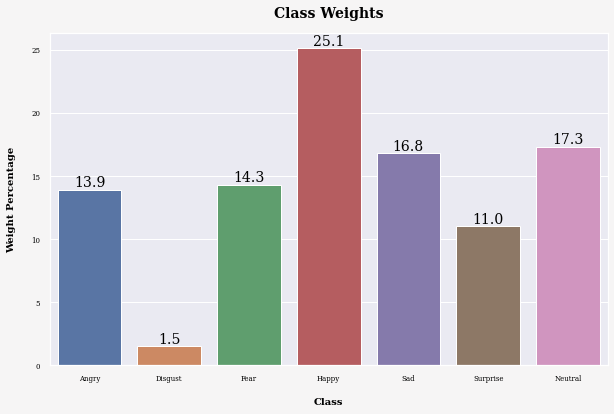

In [8]:
class_weight = dict(
                  zip(emotions.values(), round(((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index()) 
                                          / len(data[data[' Usage']=='Training']['emotion']) * 100 
                                          , 1
                                    )
                  )
            )

# class_weight = {0: 13.9, 1: 1.5, 2: 14.3, 3: 25.1, 4: 16.8, 5: 11.0, 6: 17.3}


class_weight_df = pd.DataFrame(list(class_weight.items()), columns=['Class', 'Weight'])


plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Class', y='Weight', data=class_weight_df)

for index, row in class_weight_df.iterrows():
    barplot.text(index, row.Weight, round(row.Weight, 1), color='black', ha="center", va='bottom')

plt.ylabel('Weight Percentage')
plt.title('Class Weights')

plt.show()

In [9]:
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label tensors """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    image_array = torch.from_numpy(image_array)
    image_label = torch.from_numpy(image_label)

        
    return image_array, image_label

In [10]:
df_train_array, df_train_label = prepare_data(data[data[' Usage']=='Training']) # modified train set
df_val_array, df_val_label = prepare_data(data[data[' Usage']=='PublicTest'])
df_test_array, df_test_label = prepare_data(data[data[' Usage']=='PrivateTest'])


print(f"{RED}Train:", f"{CLR}{df_train_array.shape}", f"{df_train_label.shape}")
print(f"{RED}Validation:", f"{CLR}{df_val_array.shape}", f"{df_val_label.shape}")
print(f"{RED}Test:", f"{CLR}{df_test_array.shape}", f"{df_test_label.shape}")




Train: torch.Size([28709, 48, 48]) torch.Size([28709])
Validation: torch.Size([3589, 48, 48]) torch.Size([3589])
Test: torch.Size([3589, 48, 48]) torch.Size([3589])


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li>This code snippet prepares training, validation, and test image datasets for a machine learning model using PyTorch. It reshapes the datasets into a format suitable for a convolutional neural network (with 1 channel and 48x48 pixel images).</li>
    <li>Converts the data type to torch.float32, and normalizes the pixel values to the range [0, 1] by dividing by 255.</li>
    <li>Encoding of the target value</li>
</ul>
</blockquote>


In [11]:
train_images = df_train_array.view((df_train_array.shape[0], 1, 48, 48))
train_images = train_images.to(dtype = torch.float32) / 255

val_images = df_val_array.view((df_val_array.shape[0], 1, 48, 48))
val_images = val_images.to(dtype = torch.float32) / 255

test_images = df_test_array.view((df_test_array.shape[0], 1, 48, 48))
test_images = test_images.to(dtype = torch.float32) / 255

In [12]:
def to_categorical_torch(y, num_classes):
    
    return torch.eye(num_classes)[y]


train_labels = to_categorical_torch(df_train_label, 7)
val_labels = to_categorical_torch(df_val_label, 7)
test_labels = to_categorical_torch(df_test_label, 7)


<p style="
    font-size: 20px;
    font-family: 'JetBrains Mono';
    border-bottom: 3px solid #778899;
">
    <b>Notes</b> 📜
</p>

<blockquote style="
    margin-right: auto; 
    margin-left: auto; 
    background-color:#222; 
    padding: 15px; 
    border-radius: 8px;
    border-left: none;
">
<ul style="
    font-size: 16px;
    font-family: 'JetBrains Mono';
    color: #f2f2f0;
    margin-left: 8px;
    margin-right: 8px;
    margin-top: 4px; 
    margin-bottom: 4px;
">
    <li style='padding-bottom: 10px;'><code>plot_examples():</code> Plots 5 example images for a specified emotion label.</li>
    <li style='padding-bottom: 10px;'><code>plot_all_emotions():</code> Similar in purpose to plot_examples but instead plots one example for each of the 7 emotions in a single row.</li>
    <li style='padding-bottom: 10px;'><code>plot_image_and_emotion():</code> This function plots a specific test image alongside a bar chart comparing the predicted emotion probabilities against the actual label. It's useful for evaluating the model's performance on individual samples by visually comparing the prediction against the truth.
    </li>
    <li style='padding-bottom: 10px;'><code>plot_compare_distributions():</code> Compares the emotion label distributions between two different arrays (e.g., predicted vs. actual labels) through bar charts. It calculates the distribution of each emotion within the provided arrays and visualizes them side by side for comparison. This is particularly useful for analyzing the model's prediction bias or skewness towards certain emotions.
    </li>
</ul>
</blockquote>


In [13]:
def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = data[data['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
      
      
        
def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(16, 8))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = data[data['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][0][:,:], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax().item()]) 
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
        
        
def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    """ Function to plot the image and compare the prediction results with the label """
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    
    bar_label = emotions.values()
    
    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])
    
    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()
    
    plt.show()
  
  
    
def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)

    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()
    
    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='green')
    axs[0].set_title(title1)
    axs[0].grid()
    
    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()
    
    plt.show()

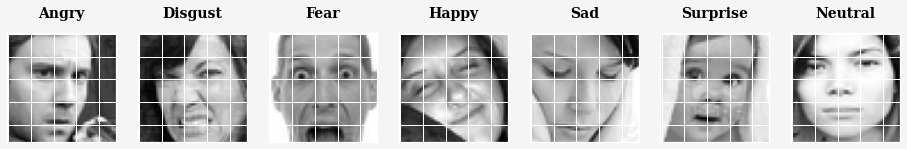

In [14]:
plot_all_emotions()

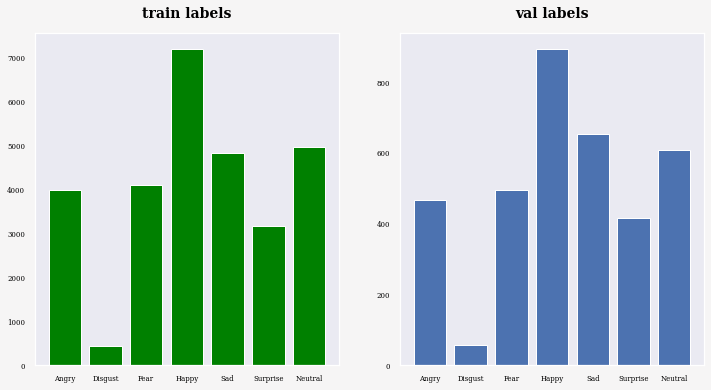

In [15]:
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

# <p style="padding: 15px; background-color: #778899; font-family: 'JetBrains Mono'; font-weight: bold; font-size: 125%; color: #f2f2f0; letter-spacing: 2px; text-align: center; border-radius: 8px;">Model Selection</p>

In [16]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.features = nn.Sequential(
            
            # First convolutional block
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(32),
            
            
            # Second convolutional block
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(64),
            
            # Third convolutional block
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.2),
            nn.BatchNorm2d(128),
        )
        
        
        self.classifier = nn.Sequential(
            nn.Linear(6*6*128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(32),
            nn.Linear(32, 7),
            nn.ReLU()  
        )
    
    def forward(self, x):
        x = self.features(x)         
        x = x.view(-1, 6*6*128)       
        x = self.classifier(x)        
        return x

In [17]:
# See Model
model = ConvNet()
# summary(model,  (1, 48, 48))

### Device configuration


In [18]:
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)



if torch.cuda.is_available():
      device = torch.device('cuda')
      print(f"Using device: {device}")
      print(torch.cuda.get_device_name(0))

elif torch.backends.mps.is_available():
      device = torch.device("mps")
      print(f"Using device: {device}")
      print('Running on the GPU')
else:
      device = torch.device("cpu")
      print('Running on the CPU')

      

PyTorch version: 2.1.2
Torchvision version: 0.16.2
Using device: cuda
Tesla P100-PCIE-16GB


### `training_weights` - for Calculating weights for each Batch Size.
### `calculate_weights` - for calculating weights .
### `plot_losses` -  for ploting losses.

In [32]:
def calculate_weights(data_loaders, data_sizes, model, optimizer, criterion, batch, epochs = 10, training = True):
    
      loss_values = []
      acc_values = []
      since = time.time()
      
      best_loss = float('inf')
      best_acc = 0.0
      
      for epoch in range(epochs):
            
            for phase in ['train', 'val']:
                  
                  if phase == 'train':
                        model.train()
                  else:
                        model.eval()
                  
                  # For calculating Accuracy and Loss      
                  running_corrects = 0.0
                  running_loss = 0.0      
                  n_total_steps = len(data_loaders[phase]) 
                  
                        
                  for i, (inputs, labels) in enumerate(data_loaders[phase]):

                        # Move images and labels to device if using GPU
                        inputs, labels = inputs.to(device), labels.to(device)
                        
                        # Forward pass
                        # Track Histroy if only in train
                        with torch.set_grad_enabled(phase == 'train'):
                              
                        
                              outputs = model(inputs)
                              _, preds = torch.max(outputs, 1)  
                              loss = criterion(outputs, labels)

                              if phase == 'train':
                        
                                    # Backward and optimize
                                    optimizer.zero_grad()
                                    loss.backward()
                                    optimizer.step()
                        
                        # statistics
                        running_loss += loss.item() * inputs.size(0)
                        running_corrects += torch.sum(preds == labels.data)  
                        
                        
                  
                  epoch_acc = running_corrects.float() / data_sizes[phase]
                  epoch_loss = running_loss / data_sizes[phase]
                  
                  if phase == 'val':
                        acc_values.append(epoch_acc.cpu())
                        loss_values.append(epoch_loss)
                        
                  
                  if epoch % round(epochs / 4) == 0:
                              
                        print(f'{CLR}{phase}:  {RED}Batch: {CLR}{batch}, {RED}Epoch {CLR}[{epoch+1}/{epochs}], {RED}Step {CLR}[{i+1}/{n_total_steps}], {RED}Loss: {BLUE}{loss.item():.4f}, {RED}Acc: {BLUE}{epoch_acc:.4f}') 
  
  
                
                  if training:
                        
                       
                        # Deep copy the model
                        if phase == 'val' and epoch_acc > best_acc:
                              best_acc = epoch_acc
                              # best_model_wts = copy.deepcopy(model.state_dict())
                              torch.save(model, 'best-model.pt')
                              torch.save(model.state_dict(), 'best-model-parameters.pt')
                  
        
      time_elapsed = time.time() - since
      print(f"{CLR}Training complete in {(time_elapsed // 60):.0f}m {(time_elapsed % 60):.0f}s")  
      print()  
    
      if training:
            accuracies, losses = {} , {}
            accuracies.update({batch: acc_values})
            losses.update({batch: loss_values})
            return losses, accuracies
      
        
      return loss_values , acc_values




def plot_losses(lr_rate, losses, epochs):
      plt.figure(figsize=(24, 8))
      
      for key, value in losses.items():
            plt.plot(range(epochs), value, label = f'For batch: {key}')
      
      plt.title(f'Validation Loss by Epoch, Learning Rate : {lr_rate}')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')      
      plt.legend()
      plt.show()


def plot_accuracy(lr_rate, accuracies, epochs):
      plt.figure(figsize=(18, 8))

      for key, value in accuracies.items():
            plt.plot(range(epochs), value, label = f"For batch: {key}")
            
      plt.title(f'Validation Accuracy by Epoch, Learning Rate : {lr_rate}')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.show()
      
      

def reset_weights(m):
    """
    Resets model weights to avoid weight leakage between training runs with different batch sizes.
    """
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()
        

def initialize_optimizer(model, learning_rate):
    
    return torch.optim.Adam(model.parameters(), lr=learning_rate)



def tuning_model(model, criterion, epochs, batch_sizes, learning_rate):
      
            
      losses = {}
      accuracies = {}
      all_time_start = time.time()

      train_dataset, val_dataset = TensorDataset(train_images, df_train_label), TensorDataset(val_images, df_val_label)
      len_train_data, len_val_data = len(train_dataset), len(val_dataset)
      
      
      
      for lr_rate in learning_rate:
            print(f"For Learning Rate: {RED}{lr_rate}")
      
            for batch in batch_sizes:

                  train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
                  val_loader = DataLoader(val_dataset, batch_size=batch, shuffle=True)
                  
                  # For calculate_weights()
                  data_loaders = {'train': train_loader, 'val': val_loader}
                  data_sizes = {'train': len_train_data, 'val': len_val_data}
                  

                  model.apply(reset_weights)
                  optimizer = initialize_optimizer(model, lr_rate) 

                  # Train the model with the current batch size
                  loss_batch, accuracy_batch = calculate_weights(data_loaders, data_sizes, model, optimizer, criterion, batch = batch, epochs = epochs, training=False)
                  
                  
                  losses.update({batch: loss_batch})
                  accuracies.update({batch: accuracy_batch})


            all_time = time.time() - all_time_start    

            print(f"{BLUE}Training complete in {(all_time // 60):.0f}m {(all_time % 60):.0f}s")  
            print(f"{BLUE}Ploting Losses and Accuracies")      
            print()  


            plot_losses(lr_rate, losses, epochs)
            print()
            plot_accuracy(lr_rate, accuracies, epochs)
      
      
      all_time = time.time() - all_time_start    
      print(f"{BLUE}Finished All Trainings !!!")
      print(f"{BLUE}Training complete in {(all_time // 60):.0f}m {(all_time % 60):.0f}s")  

      


      
      

# Model Tuning

For Learning Rate: 0.001
train:  Batch: 64, Epoch [1/121], Step [449/449], Loss: 1.5457, Acc: 0.2810
val:  Batch: 64, Epoch [1/121], Step [57/57], Loss: 2.3913, Acc: 0.4135
train:  Batch: 64, Epoch [41/121], Step [449/449], Loss: 0.4576, Acc: 0.8436
val:  Batch: 64, Epoch [41/121], Step [57/57], Loss: 1.4410, Acc: 0.6291
train:  Batch: 64, Epoch [81/121], Step [449/449], Loss: 0.4091, Acc: 0.9071
val:  Batch: 64, Epoch [81/121], Step [57/57], Loss: 3.1420, Acc: 0.6241
train:  Batch: 64, Epoch [121/121], Step [449/449], Loss: 0.3427, Acc: 0.9262
val:  Batch: 64, Epoch [121/121], Step [57/57], Loss: 4.2184, Acc: 0.6222
Training complete in 8m 33s

train:  Batch: 128, Epoch [1/121], Step [225/225], Loss: 1.6509, Acc: 0.2918
val:  Batch: 128, Epoch [1/121], Step [29/29], Loss: 1.4778, Acc: 0.3823
train:  Batch: 128, Epoch [41/121], Step [225/225], Loss: 0.3739, Acc: 0.8451
val:  Batch: 128, Epoch [41/121], Step [29/29], Loss: 2.3582, Acc: 0.6283
train:  Batch: 128, Epoch [81/121], Step [22

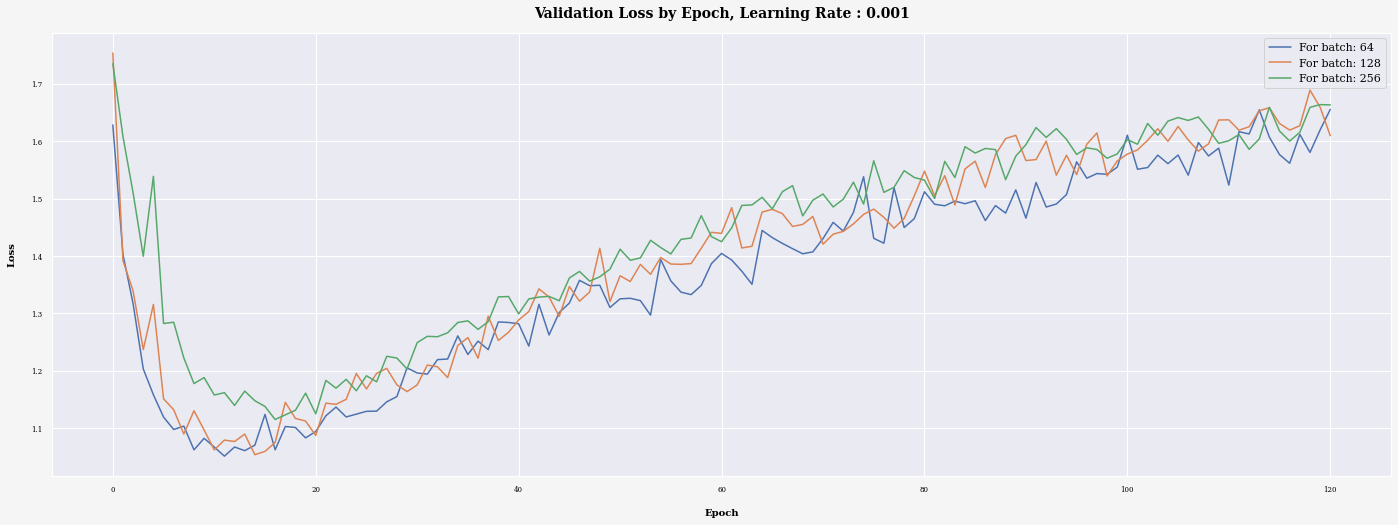

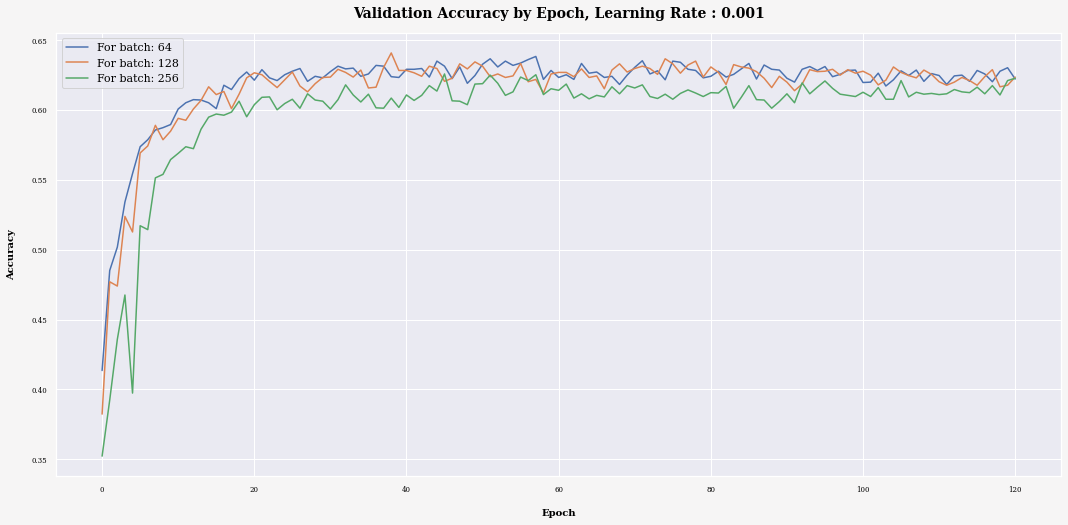

For Learning Rate: 0.0001
train:  Batch: 64, Epoch [1/121], Step [449/449], Loss: 2.0277, Acc: 0.2113
val:  Batch: 64, Epoch [1/121], Step [57/57], Loss: 1.7296, Acc: 0.3026
train:  Batch: 64, Epoch [41/121], Step [449/449], Loss: 0.6142, Acc: 0.7958
val:  Batch: 64, Epoch [41/121], Step [57/57], Loss: 1.9035, Acc: 0.6113
train:  Batch: 64, Epoch [81/121], Step [449/449], Loss: 0.2974, Acc: 0.8850
val:  Batch: 64, Epoch [81/121], Step [57/57], Loss: 0.2888, Acc: 0.6186
train:  Batch: 64, Epoch [121/121], Step [449/449], Loss: 0.2305, Acc: 0.9169
val:  Batch: 64, Epoch [121/121], Step [57/57], Loss: 1.3639, Acc: 0.6016
Training complete in 8m 31s

train:  Batch: 128, Epoch [1/121], Step [225/225], Loss: 1.8935, Acc: 0.2019
val:  Batch: 128, Epoch [1/121], Step [29/29], Loss: 1.6768, Acc: 0.2792
train:  Batch: 128, Epoch [41/121], Step [225/225], Loss: 0.8286, Acc: 0.7636
val:  Batch: 128, Epoch [41/121], Step [29/29], Loss: 1.5917, Acc: 0.5910
train:  Batch: 128, Epoch [81/121], Step [2

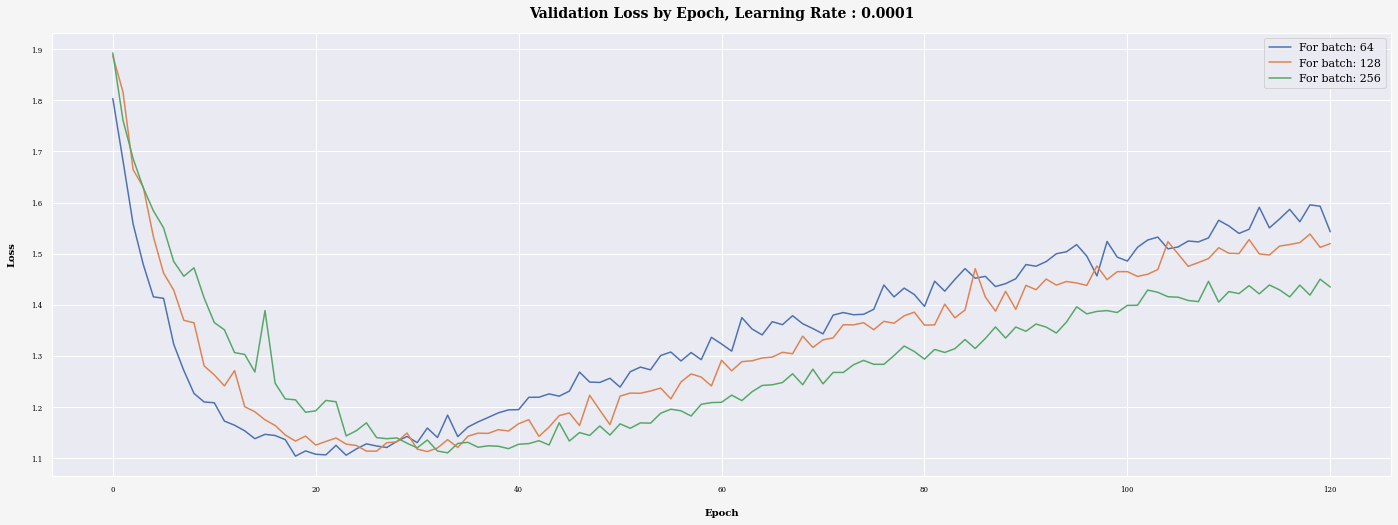

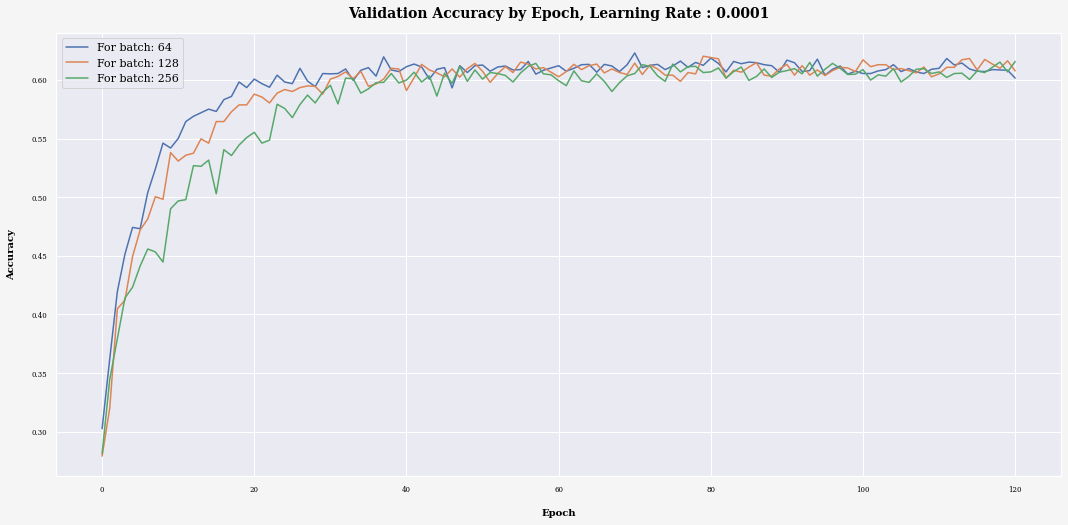

For Learning Rate: 1e-05
train:  Batch: 64, Epoch [1/121], Step [449/449], Loss: 1.8975, Acc: 0.1480
val:  Batch: 64, Epoch [1/121], Step [57/57], Loss: 2.0157, Acc: 0.1677
train:  Batch: 64, Epoch [41/121], Step [449/449], Loss: 1.3304, Acc: 0.4665
val:  Batch: 64, Epoch [41/121], Step [57/57], Loss: 1.5425, Acc: 0.4767
train:  Batch: 64, Epoch [81/121], Step [449/449], Loss: 1.4188, Acc: 0.5730
val:  Batch: 64, Epoch [81/121], Step [57/57], Loss: 1.1665, Acc: 0.5500
train:  Batch: 64, Epoch [121/121], Step [449/449], Loss: 1.2862, Acc: 0.6527
val:  Batch: 64, Epoch [121/121], Step [57/57], Loss: 2.4254, Acc: 0.5804
Training complete in 8m 32s

train:  Batch: 128, Epoch [1/121], Step [225/225], Loss: 1.8823, Acc: 0.1667
val:  Batch: 128, Epoch [1/121], Step [29/29], Loss: 2.0029, Acc: 0.2469
train:  Batch: 128, Epoch [41/121], Step [225/225], Loss: 1.5954, Acc: 0.4343
val:  Batch: 128, Epoch [41/121], Step [29/29], Loss: 1.4470, Acc: 0.4444
train:  Batch: 128, Epoch [81/121], Step [22

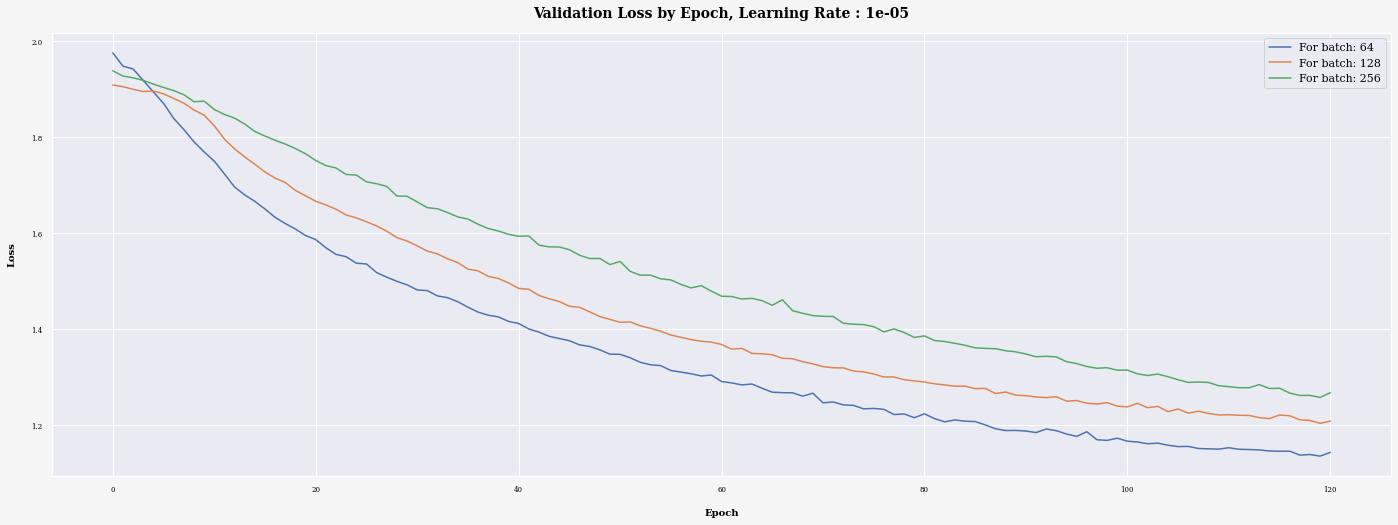

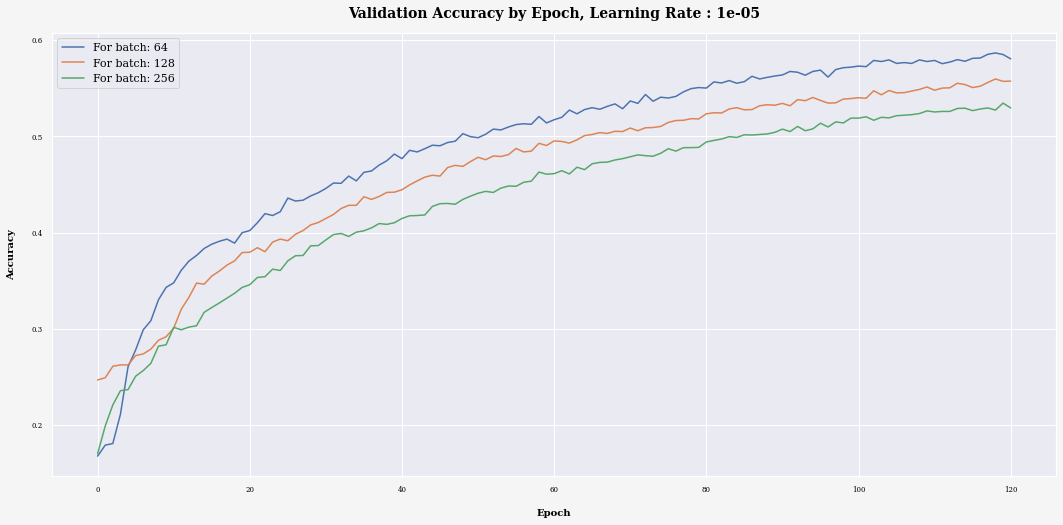

Finished All Trainings !!!
Training complete in 73m 13s


In [33]:
# Hyperparameters
LEARNING_RATE = [0.001, 1e-04, 1e-05]
EPOCHS = 121
BATCH_SIZE = [64, 128, 256]
WEIGHTS = torch.tensor([1.0, 5.0, 1.0, 0.9, 1.0, 1.8, 1.0], dtype=torch.float).to(device)

# Model
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss(weight=WEIGHTS)

# Training
tuning_model(model, criterion, EPOCHS, BATCH_SIZE, LEARNING_RATE)

## Model Training

train:  Batch: 256, Epoch [1/200], Step [113/113], Loss: 1.9778, Acc: 0.1465
val:  Batch: 256, Epoch [1/200], Step [15/15], Loss: 1.8561, Acc: 0.1337
train:  Batch: 256, Epoch [31/200], Step [113/113], Loss: 1.7885, Acc: 0.3513
val:  Batch: 256, Epoch [31/200], Step [15/15], Loss: 1.8935, Acc: 0.3918
train:  Batch: 256, Epoch [61/200], Step [113/113], Loss: 1.7043, Acc: 0.4326
val:  Batch: 256, Epoch [61/200], Step [15/15], Loss: 0.7665, Acc: 0.4556
train:  Batch: 256, Epoch [91/200], Step [113/113], Loss: 1.4318, Acc: 0.4928
val:  Batch: 256, Epoch [91/200], Step [15/15], Loss: 1.4404, Acc: 0.4976
train:  Batch: 256, Epoch [121/200], Step [113/113], Loss: 1.3004, Acc: 0.5383
val:  Batch: 256, Epoch [121/200], Step [15/15], Loss: 1.2936, Acc: 0.5350
train:  Batch: 256, Epoch [151/200], Step [113/113], Loss: 1.4042, Acc: 0.5755
val:  Batch: 256, Epoch [151/200], Step [15/15], Loss: 1.4101, Acc: 0.5508
train:  Batch: 256, Epoch [181/200], Step [113/113], Loss: 1.2487, Acc: 0.6047
val:  B

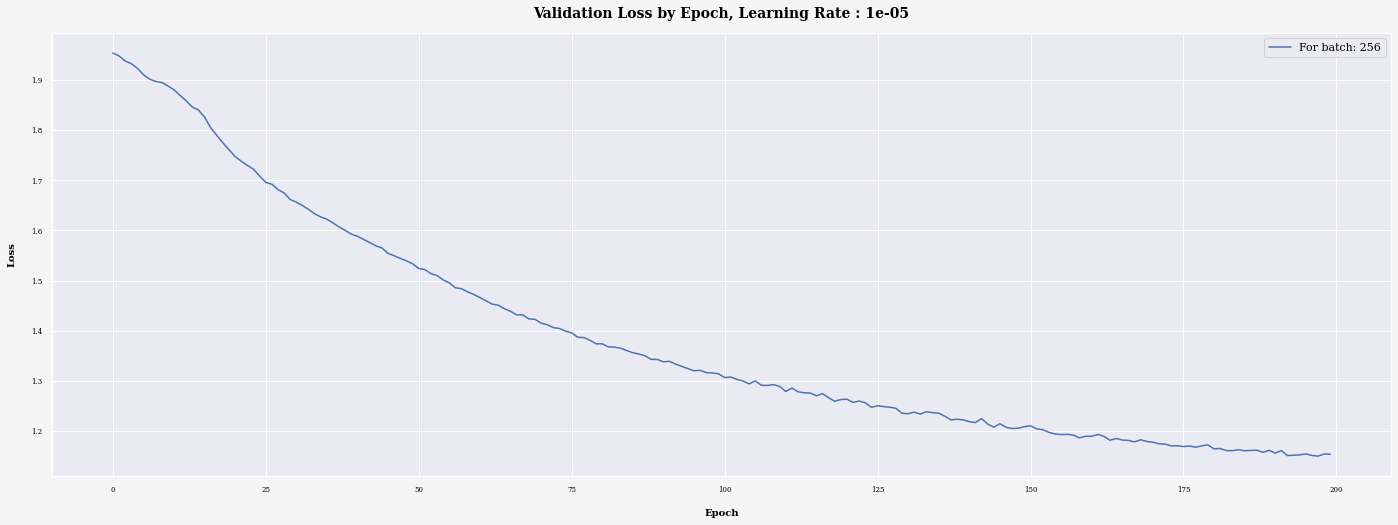

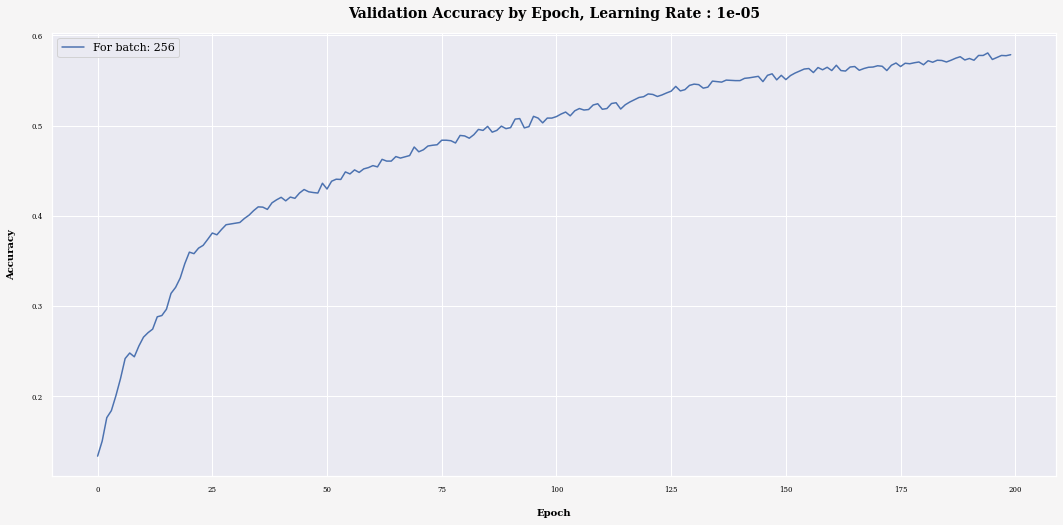

In [34]:

# Hyperparameters
LEARNING_RATE = 1e-05
EPOCHS = 200
BATCH_SIZE = 256
WEIGHTS = torch.tensor([1.0, 5.0, 1.0, 0.8, 1.0, 1.8, 1.0], dtype=torch.float).to(device)

      
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss(weight=WEIGHTS)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)


train_dataset = TensorDataset(train_images, df_train_label)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
len_train_data = len(train_dataset)

val_dataset = TensorDataset(val_images, df_val_label)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
len_val_data = len(val_dataset)

data_loaders = {'train': train_loader, 'val': val_loader}
data_sizes = {'train': len_train_data, 'val': len_val_data}

test_dataset = TensorDataset(test_images, df_test_label)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


loss, acc = calculate_weights(data_loaders, data_sizes, model, optimizer, criterion, batch = BATCH_SIZE,
                  epochs = EPOCHS, training=True)


plot_losses(LEARNING_RATE, loss, EPOCHS)
print()
plot_accuracy(LEARNING_RATE, acc, EPOCHS)

In [35]:
def pred_labels(data_loader, num_labels=num_labels):
      
      pred_test_labels = []
      test_labels = []
      
      emotions_list = list(emotions.values())
      print(f"{CLR} {str()}")
      
      # Load the entire model
      model = torch.load('best-model.pt')
      
      
      with torch.no_grad():
    
            n_correct = 0
            n_samples = 0
            n_class_correct = [0 for i in range(num_labels)]
            n_class_samples = [0 for i in range(num_labels)]
            
            for images, labels in data_loader:
                  
                  images, labels = images.to(device), labels.to(device)
                  outputs = model(images)
                  # max returns (value ,index)
                  _, predicted = torch.max(outputs, 1)
                  n_samples += labels.size(0)
                  n_correct += (predicted == labels).sum().item()
                  
                  pred_test_labels.extend(predicted.cpu().numpy())
                  test_labels.extend(labels.cpu().numpy())
                  

                  for i in range(len(labels)):
                        label = labels[i].item()
                        pred = predicted[i].item()
                        if (label == pred):
                              n_class_correct[label] += 1
                        n_class_samples[label] += 1
      

            pred_test_labels = np.array(pred_test_labels)
            test_labels = np.array(test_labels)

            acc = 100.0 * n_correct / n_samples
            print(f'{CLR}Accuracy of {RED}The Network  {BLUE}{acc:.3f} %', sep='')

            for i in range(num_labels):
                  acc = 100.0 * n_class_correct[i] / n_class_samples[i]
                  print(f'{CLR}Accuracy of {RED}{emotions_list[i]}  {BLUE}{acc:.3f} %')
      
      print()  
    
      return pred_test_labels, test_labels
                  
      

 
Accuracy of The Network  71.629 %
Accuracy of Angry  54.468 %
Accuracy of Disgust  95.183 %
Accuracy of Fear  40.298 %
Accuracy of Happy  88.080 %
Accuracy of Sad  71.511 %
Accuracy of Surprise  92.053 %
Accuracy of Neutral  72.387 %



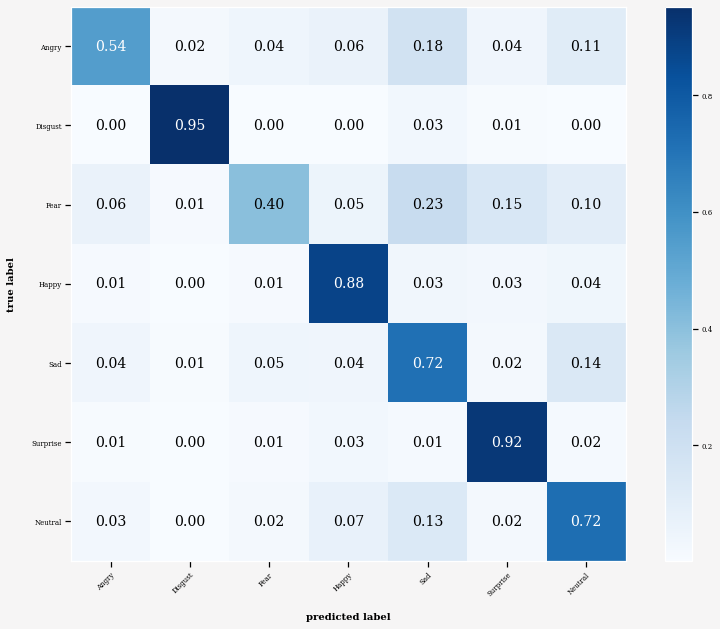

In [36]:
pred_test_labels, test_labels = pred_labels(train_loader)


conf_mat = confusion_matrix(test_labels, pred_test_labels)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                colorbar=True,
                                class_names=emotions.values(),
                                figsize=(14, 10))
fig.show()

 
Accuracy of The Network  58.066 %
Accuracy of Angry  42.363 %
Accuracy of Disgust  70.909 %
Accuracy of Fear  22.917 %
Accuracy of Happy  80.660 %
Accuracy of Sad  50.505 %
Accuracy of Surprise  82.212 %
Accuracy of Neutral  58.307 %



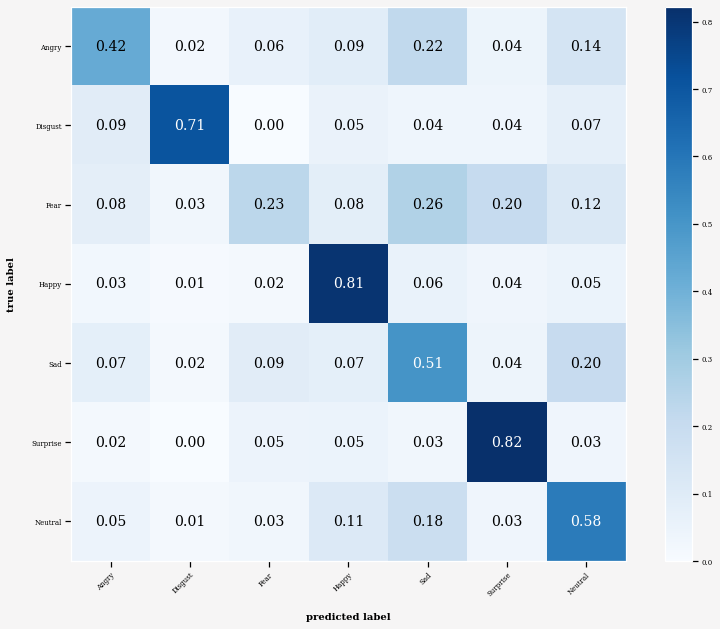

In [37]:
pred_test_labels, test_labels = pred_labels(test_loader)


conf_mat = confusion_matrix(test_labels, pred_test_labels)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                colorbar=True,
                                class_names=emotions.values(),
                                figsize=(14, 10))
fig.show()